In [3]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import math, os
from IPython.display import display
dt = pd.read_csv('AAL_data.csv')
dt = dt.drop(columns=['date', 'Name'])

In [15]:
K = 50
Procent = K/1259*100
print("Procent przewidywanych próbek: %.2f" % (Procent)) 
dt['prediction'] = dt[['open']].shift(-K)

Procent przewidywanych próbek: 3.97


In [16]:
#wejściowe
X = np.array(dt.drop(['prediction'],1)) 
X = preprocessing.scale(X)
X_dni = X[-K:]
X = X[:-K]
#wyjściowe
y = np.array(dt['prediction'])
y = y[:-K]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [17]:
import warnings
warnings.filterwarnings("ignore")
mlp = MLPRegressor(random_state=1,max_iter=500)
parametry = {'learning_rate_init': (0.1,0.01,0.001), 'hidden_layer_sizes': [20,40,60,80,100], 'solver': ['adam', 'lbfgs', 'sgd'], 'learning_rate': ('constant', 'adaptive')}
clf = GridSearchCV(mlp, parametry)
clf.fit(X_train, y_train)
print("Best params:" + str(clf.best_params_))
mlp = MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
                learning_rate=clf.best_params_['learning_rate'],
                learning_rate_init=clf.best_params_['learning_rate_init'],
                solver=clf.best_params_['solver'], activation='relu')
mlp.fit(X_train, y_train)


Best params:{'hidden_layer_sizes': 60, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}


MLPRegressor(hidden_layer_sizes=60, learning_rate='adaptive',
             learning_rate_init=0.01, max_iter=500, random_state=1,
             solver='sgd')

Dokladność (train): 79.28019444474779%
Dokladność (test): 79.48252615808225%
[49.53686677 49.37077652 47.49346861 48.27055963 47.32901979 47.38407736
 49.1526004  49.84229394 51.19365567 49.57057816 50.66505365 50.63629556
 50.0219058  49.06742884 46.59949353 49.84899241 50.12790645 48.58241876
 48.31332754 51.0213432  51.29396874 50.88788292 51.51475991 50.94279561
 50.32510273 48.60878955 51.83649941 50.43262394 50.00124207 50.76482918
 48.38184513 51.00809209 52.19828576 52.69898982 53.19796753 53.06988474
 53.19996462 52.83795618 53.31209102 48.26725075 48.9530844  48.68539304
 48.06858746 49.00528455 49.99025429 50.89755461 49.71247885 48.25580035
 48.86795946 48.98387512]
[48.61 48.44 49.38 49.76 49.67 50.1  49.85 49.39 49.53 51.23 50.78 51.27
 50.58 50.59 50.67 51.25 51.6  51.57 52.16 52.72 52.35 52.8  52.45 52.42
 52.33 52.86 52.48 52.78 52.6  52.97 53.23 54.49 56.56 58.79 58.31 58.
 58.59 57.99 57.74 54.35 54.   53.65 52.79 52.45 53.08 54.   53.49 51.99
 49.32 50.91]


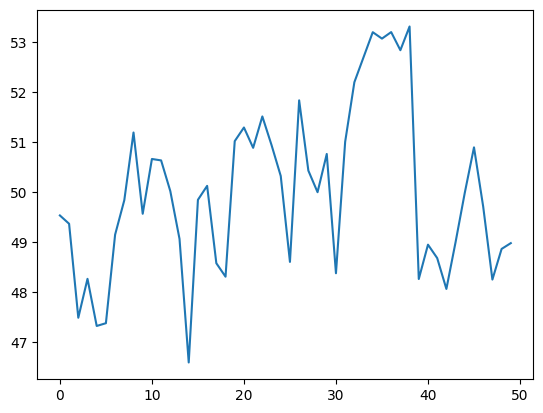

In [18]:
print("Dokladność (train): " + str(mlp.score (X_train,y_train)*100) + '%')
print("Dokladność (test): " + str(mlp.score (X_test,y_test)*100) + '%')
prediction_dni = mlp.predict(X_dni)
print(prediction_dni)
print(np.array(dt['open'])[-K:])
plt.plot(prediction_dni)
plt.show()